In [1]:
import numpy as np
import time
import math
import matplotlib.pyplot as plt

# Тестовая функция - Функция Била

In [2]:
def beal_function(X):
    res = (
        (1.5 - X[0] + X[0] * X[1]) ** 2
        + (2.25 - X[0] + X[0] * X[1] ** 2) ** 2
        + (2.625 - X[0] + X[0] * X[1] ** 3) ** 2
    )
    return  res

# Оптимизация генетическим алгоритмом

In [10]:
from geneticalgorithm import geneticalgorithm

 The best solution found:                                                                           
 [3.00646381 0.50177731]

 Objective function:
 7.383530587819942e-06


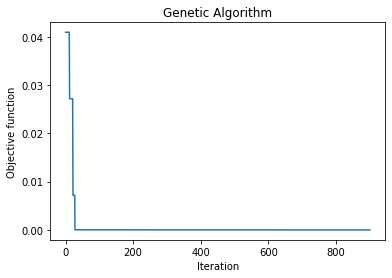

Время выполнения 10.649173974990845


In [11]:
time_start = time.time()
varbound = np.array([[-4.5,4.5]]*2)
model = geneticalgorithm(function=beal_function, 
                         dimension=2, 
                         variable_type='real', 
                         variable_boundaries=varbound)
model.run()
time_end = time.time()
print("Время выполнения {}".format(time_end-time_start))

# Вычисление мат ожидания и дисперсии путем 100 прогонов

In [12]:
my_list = []

In [13]:
for i in range(100):
    print("Шаг номер ", i)
    time_start = time.time()
    model = geneticalgorithm(function=beal_function, 
                             dimension=2, 
                             variable_type='real', 
                             variable_boundaries=varbound,
                             convergence_curve=False,
                             progress_bar=False)
    model.run()
    my_list.append(model.best_function)
    time_end = time.time()
    print("Время выполнения: {}".format(time_end-time_start))

Шаг номер  0
 The best solution found:
 [3.06638692 0.51758748]

 Objective function:
 0.0007183887415184282
Время выполнения: 9.017561912536621
Шаг номер  1
 The best solution found:
 [3.00739806 0.50170382]

 Objective function:
 9.052994349330163e-06
Время выполнения: 9.038349628448486
Шаг номер  2
 The best solution found:
 [2.95390632 0.48801353]

 Objective function:
 0.000360540556207293
Время выполнения: 9.33601188659668
Шаг номер  3
 The best solution found:
 [2.91762366 0.48031143]

 Objective function:
 0.0012348488750147982
Время выполнения: 9.411257028579712
Шаг номер  4
 The best solution found:
 [2.95112005 0.4861268 ]

 Objective function:
 0.00045270480901931634
Время выполнения: 9.174082517623901
Шаг номер  5
 The best solution found:
 [2.88925243 0.46767595]

 Objective function:
 0.00247798449160694
Время выполнения: 9.386618375778198
Шаг номер  6
 The best solution found:
 [2.98163299 0.49470139]

 Objective function:
 6.641964056755969e-05
Время выполнения: 9.2656

Время выполнения: 9.34970235824585
Шаг номер  57
 The best solution found:
 [3.01321887 0.503704  ]

 Objective function:
 3.21953668843284e-05
Время выполнения: 9.317277193069458
Шаг номер  58
 The best solution found:
 [3.03636943 0.50981313]

 Objective function:
 0.00022435723307386132
Время выполнения: 9.30510401725769
Шаг номер  59
 The best solution found:
 [2.94397902 0.48557078]

 Objective function:
 0.0005358739249087864
Время выполнения: 9.161272525787354
Шаг номер  60
 The best solution found:
 [3.01408291 0.50302114]

 Objective function:
 3.602470085418988e-05
Время выполнения: 9.232426881790161
Шаг номер  61
 The best solution found:
 [2.97082743 0.49295589]

 Objective function:
 0.00014243421976318073
Время выполнения: 9.159883260726929
Шаг номер  62
 The best solution found:
 [3.05270027 0.51427937]

 Objective function:
 0.0004748918509190643
Время выполнения: 9.241236925125122
Шаг номер  63
 The best solution found:
 [3.03560064 0.50942105]

 Objective function:
 0

In [15]:
print("M(X) = ", np.mean(my_list))
print("D(X) = ", np.var(my_list))

M(X) =  0.0005030573886427084
D(X) =  8.081618481999791e-07


**Вывод**: Значение дисперсии является крайне малым, следовательно алгоритм **сходится**

# Оптимизация алгоритмом роя частиц

In [3]:
import pyswarms as ps

In [4]:
def beal_function2(X):
    x = X[:, 0]
    y = X[:, 1]
    res = (
        (1.5 - x + x * y) ** 2
        + (2.25 - x + x * y ** 2) ** 2
        + (2.625 - x + x * y ** 3) ** 2
    )
    return  res

In [5]:
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

#varbound = np.array([[-4.5,4.5]]*2)
max_bound = 4.5 * np.ones(2)
min_bound = - max_bound
varbound = (min_bound, max_bound)

# Call instance of GlobalBestPSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, 
                                          dimensions=2,
                                          options=options,
                                          bounds=varbound)
time_start = time.time()
stats = optimizer.optimize(beal_function2, iters=100)
time_end = time.time()

2021-11-25 21:07:56,889 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|100/100, best_cost=0.000377
2021-11-25 21:07:56,947 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.00037708101191513785, best pos: [3.0498406  0.51193967]


In [6]:
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

Время выполнения: 0.05884194374084473


<AxesSubplot:title={'center':'Cost History'}, xlabel='Iterations', ylabel='Cost'>

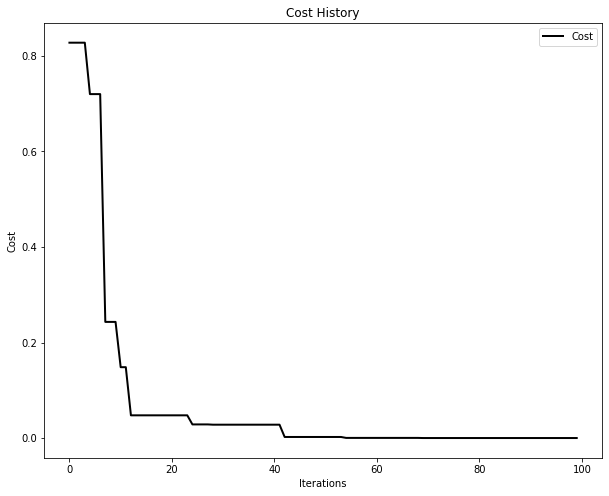

In [7]:
print("Время выполнения: {}".format(time_end-time_start))
plot_cost_history(cost_history=optimizer.cost_history)

In [8]:
print("Лучшее решение: ", stats[1])
print("Наименьшее значение функции: ", stats[0])

Лучшее решение:  [3.0498406  0.51193967]
Наименьшее значение функции:  0.00037708101191513785


In [9]:
from pyswarms.utils.plotters.formatters import Mesher, Designer

C:\Users\shars\anaconda3\envs\demidova\lib\site-packages\pyswarms\utils\plotters\plotters.py:222: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, zz, levels=mesher.levels)


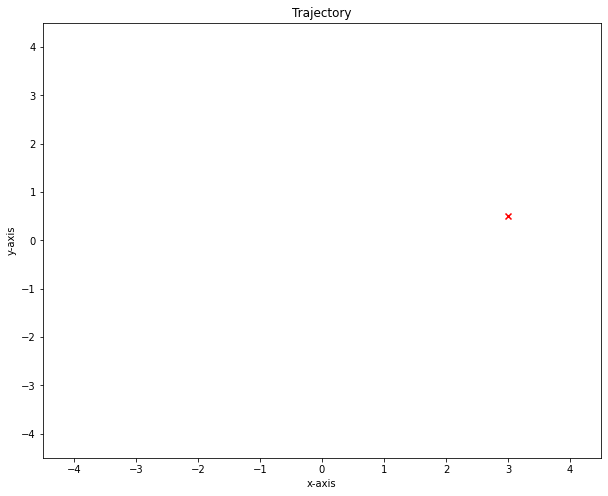

In [10]:
# Initialize mesher with sphere function
m = Mesher(func=beal_function2)
d = Designer(limits=[(-4.5,4.5), (-4.5,4.5), (-1,1)], label=['x-axis', 'y-axis', 'z-axis'])
# Make animation
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m, designer=d,
                         mark=(3,0.5))

In [11]:
animation.save("Beale function swarm of particles.gif")

2021-11-25 21:08:15,315 - matplotlib.animation - WARNING - MovieWriter ffmpeg unavailable; using Pillow instead.
2021-11-25 21:08:15,316 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


# Вычисление мат ожидания и дисперсии путем 100 прогонов

In [21]:
my_list = []

In [22]:
for i in range(100):
    print("Шаг номер ", i)
    optimizer = ps.single.GlobalBestPSO(n_particles=10, 
                                        dimensions=2, 
                                        options=options, 
                                        bounds=varbound)
    time_start = time.time()
    stats = optimizer.optimize(beal_function2, iters=100)
    time_end = time.time()
    print("Наименьшее значение функции: ", stats[0])
    print("Время выполнения: {}".format(time_end-time_start))
    my_list.append(stats[0])

2021-11-25 21:20:23,775 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Шаг номер  0


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=5.65e-6
2021-11-25 21:20:23,830 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.64741400347674e-06, best pos: [2.99463815 0.49845655]
2021-11-25 21:20:23,834 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  5.64741400347674e-06
Время выполнения: 0.05485224723815918
Шаг номер  1


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=1.39e-5
2021-11-25 21:20:23,889 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.3871748780499874e-05, best pos: [3.00529688 0.50194661]
2021-11-25 21:20:23,894 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  1.3871748780499874e-05
Время выполнения: 0.05585169792175293
Шаг номер  2


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|100/100, best_cost=0.000748
2021-11-25 21:20:23,945 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0007477496113235702, best pos: [2.93428622 0.48284443]
2021-11-25 21:20:23,950 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.0007477496113235702
Время выполнения: 0.05285835266113281
Шаг номер  3


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=1.85e-5
2021-11-25 21:20:24,006 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.8538006585038797e-05, best pos: [2.98955996 0.49759766]
2021-11-25 21:20:24,012 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  1.8538006585038797e-05
Время выполнения: 0.05684804916381836
Шаг номер  4


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|100/100, best_cost=0.000482
2021-11-25 21:20:24,088 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0004815880191928783, best pos: [3.05630088 0.51320644]
2021-11-25 21:20:24,094 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.0004815880191928783
Время выполнения: 0.07583045959472656
Шаг номер  5


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=2.55e-7
2021-11-25 21:20:24,155 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.551636254273762e-07, best pos: [3.00036039 0.50019013]
2021-11-25 21:20:24,165 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  2.551636254273762e-07
Время выполнения: 0.06183505058288574
Шаг номер  6


pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████|100/100, best_cost=1.2e-5
2021-11-25 21:20:24,226 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.19917253270525e-05, best pos: [2.99197872 0.49773939]
2021-11-25 21:20:24,235 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  1.19917253270525e-05
Время выполнения: 0.06183362007141113
Шаг номер  7


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=1.16e-6
2021-11-25 21:20:24,295 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.1571790764969748e-06, best pos: [3.0017464  0.50060295]
2021-11-25 21:20:24,304 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  1.1571790764969748e-06
Время выполнения: 0.06083846092224121
Шаг номер  8


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=3.12e-5
2021-11-25 21:20:24,362 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.11534394242595e-05, best pos: [2.98648227 0.49637506]
2021-11-25 21:20:24,370 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  3.11534394242595e-05
Время выполнения: 0.05884361267089844
Шаг номер  9


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████|100/100, best_cost=0.802
2021-11-25 21:20:24,432 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.801633180133472, best pos: [-3.93910711  1.20891931]
2021-11-25 21:20:24,440 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.801633180133472
Время выполнения: 0.06176948547363281
Шаг номер  10


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=5.23e-7
2021-11-25 21:20:24,498 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.231396679845807e-07, best pos: [2.99820131 0.49956726]
2021-11-25 21:20:24,509 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  5.231396679845807e-07
Время выполнения: 0.05884242057800293
Шаг номер  11


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|100/100, best_cost=0.000405
2021-11-25 21:20:24,569 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.00040468487855186883, best pos: [2.9604804  0.48747165]
2021-11-25 21:20:24,581 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.00040468487855186883
Время выполнения: 0.06084156036376953
Шаг номер  12


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=9.61e-6
2021-11-25 21:20:24,645 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 9.610219318400549e-06, best pos: [2.99810059 0.50015491]
2021-11-25 21:20:24,653 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  9.610219318400549e-06
Время выполнения: 0.06382942199707031
Шаг номер  13


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=2.47e-6
2021-11-25 21:20:24,707 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.4666752245951524e-06, best pos: [2.99943034 0.50018233]
2021-11-25 21:20:24,712 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  2.4666752245951524e-06
Время выполнения: 0.05488848686218262
Шаг номер  14


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=9.34e-6
2021-11-25 21:20:24,767 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 9.340977421192914e-06, best pos: [2.99355448 0.49805731]
2021-11-25 21:20:24,772 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  9.340977421192914e-06
Время выполнения: 0.05485415458679199
Шаг номер  15


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=1.11e-6
2021-11-25 21:20:24,829 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.1097353061460637e-06, best pos: [2.99749524 0.49944511]
2021-11-25 21:20:24,834 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  1.1097353061460637e-06
Время выполнения: 0.05649161338806152
Шаг номер  16


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████████|100/100, best_cost=1e-5
2021-11-25 21:20:24,886 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.0000161571100804e-05, best pos: [3.00386846 0.50038433]
2021-11-25 21:20:24,891 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  1.0000161571100804e-05
Время выполнения: 0.05285763740539551
Шаг номер  17


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=1.62e-6
2021-11-25 21:20:24,945 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.6176069706124458e-06, best pos: [3.00260142 0.50049196]
2021-11-25 21:20:24,950 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  1.6176069706124458e-06
Время выполнения: 0.05385994911193848
Шаг номер  18


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=3.97e-7
2021-11-25 21:20:25,025 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.970696346427454e-07, best pos: [2.99884436 0.49980245]
2021-11-25 21:20:25,030 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  3.970696346427454e-07
Время выполнения: 0.07579731941223145
Шаг номер  19


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=4.98e-6
2021-11-25 21:20:25,084 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.976365403486952e-06, best pos: [2.99700979 0.49965009]
2021-11-25 21:20:25,089 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  4.976365403486952e-06
Время выполнения: 0.053855180740356445
Шаг номер  20


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|100/100, best_cost=0.000171
2021-11-25 21:20:25,162 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.00017068222593732318, best pos: [2.99706524 0.50198014]
2021-11-25 21:20:25,168 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.00017068222593732318
Время выполнения: 0.07331180572509766
Шаг номер  21


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=4.52e-5
2021-11-25 21:20:25,222 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.516193509589141e-05, best pos: [2.9854544  0.49568164]
2021-11-25 21:20:25,228 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  4.516193509589141e-05
Время выполнения: 0.05385637283325195
Шаг номер  22


pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████|100/100, best_cost=2.6e-6
2021-11-25 21:20:25,292 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.601721639600774e-06, best pos: [3.00240788 0.50086557]
2021-11-25 21:20:25,300 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  2.601721639600774e-06
Время выполнения: 0.06482577323913574
Шаг номер  23


pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████|100/100, best_cost=3.7e-6
2021-11-25 21:20:25,355 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.6996151671777822e-06, best pos: [3.00424783 0.50086285]
2021-11-25 21:20:25,364 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  3.6996151671777822e-06
Время выполнения: 0.05585169792175293
Шаг номер  24


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=7.09e-7
2021-11-25 21:20:25,421 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7.09097813166865e-07, best pos: [2.9989316  0.49958378]
2021-11-25 21:20:25,431 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  7.09097813166865e-07
Время выполнения: 0.056847333908081055
Шаг номер  25


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=9.42e-5
2021-11-25 21:20:25,489 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 9.419310502192635e-05, best pos: [3.02368615 0.50528493]
2021-11-25 21:20:25,502 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  9.419310502192635e-05
Время выполнения: 0.059839487075805664
Шаг номер  26


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=0.00305
2021-11-25 21:20:25,564 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0030479730091534157, best pos: [3.11537201 0.53382654]
2021-11-25 21:20:25,571 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.0030479730091534157
Время выполнения: 0.06283235549926758
Шаг номер  27


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|100/100, best_cost=0.000364
2021-11-25 21:20:25,625 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.00036378721856031293, best pos: [2.95540567 0.48989527]
2021-11-25 21:20:25,630 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.00036378721856031293
Время выполнения: 0.054852962493896484
Шаг номер  28


pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████|100/100, best_cost=9.6e-6
2021-11-25 21:20:25,686 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 9.59691108077966e-06, best pos: [3.00754639 0.5017107 ]
2021-11-25 21:20:25,691 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  9.59691108077966e-06
Время выполнения: 0.05585122108459473
Шаг номер  29


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=0.00305
2021-11-25 21:20:25,746 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.003047083933525015, best pos: [2.87393982 0.46947822]
2021-11-25 21:20:25,751 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.003047083933525015
Время выполнения: 0.05485200881958008
Шаг номер  30


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=2.95e-6
2021-11-25 21:20:25,809 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.9511241812200206e-06, best pos: [2.99575075 0.49898992]
2021-11-25 21:20:25,814 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  2.9511241812200206e-06
Время выполнения: 0.0578465461730957
Шаг номер  31


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=4.21e-6
2021-11-25 21:20:25,882 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.2147177379539005e-06, best pos: [3.00500712 0.50133725]
2021-11-25 21:20:25,887 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  4.2147177379539005e-06
Время выполнения: 0.06881546974182129
Шаг номер  32


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████████|100/100, best_cost=2e-6
2021-11-25 21:20:25,942 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.00181211510369e-06, best pos: [2.99769495 0.49920426]
2021-11-25 21:20:25,948 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  2.00181211510369e-06
Время выполнения: 0.055849552154541016
Шаг номер  33


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=9.78e-6
2021-11-25 21:20:26,004 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 9.776024620368431e-06, best pos: [2.99304279 0.49856334]
2021-11-25 21:20:26,010 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  9.776024620368431e-06
Время выполнения: 0.0578460693359375
Шаг номер  34


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|100/100, best_cost=0.000207
2021-11-25 21:20:26,084 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0002069706161096352, best pos: [2.96626866 0.49061711]
2021-11-25 21:20:26,089 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.0002069706161096352
Время выполнения: 0.0738065242767334
Шаг номер  35


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=1.98e-6
2021-11-25 21:20:26,141 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.9823863657123706e-06, best pos: [2.99651992 0.499096  ]
2021-11-25 21:20:26,147 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  1.9823863657123706e-06
Время выполнения: 0.05278277397155762
Шаг номер  36


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=1.66e-5
2021-11-25 21:20:26,222 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.6567375998020925e-05, best pos: [3.00872409 0.50259456]
2021-11-25 21:20:26,228 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  1.6567375998020925e-05
Время выполнения: 0.07579779624938965
Шаг номер  37


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████|100/100, best_cost=0.879
2021-11-25 21:20:26,284 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.8786070465981002, best pos: [-3.15454051  1.24922121]
2021-11-25 21:20:26,290 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.8786070465981002
Время выполнения: 0.05585050582885742
Шаг номер  38


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=5.92e-5
2021-11-25 21:20:26,353 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.920911735459589e-05, best pos: [3.01247575 0.5042916 ]
2021-11-25 21:20:26,360 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  5.920911735459589e-05
Время выполнения: 0.06265759468078613
Шаг номер  39


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████|100/100, best_cost=0.791
2021-11-25 21:20:26,413 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.7906654459009179, best pos: [-4.08218898  1.20223697]
2021-11-25 21:20:26,421 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.7906654459009179
Время выполнения: 0.052857160568237305
Шаг номер  40


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=2.35e-6
2021-11-25 21:20:26,481 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.347128732074411e-06, best pos: [2.99638693 0.49899851]
2021-11-25 21:20:26,488 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  2.347128732074411e-06
Время выполнения: 0.05984187126159668
Шаг номер  41


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=4.79e-6
2021-11-25 21:20:26,542 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.7887228904485635e-06, best pos: [2.99994964 0.50044301]
2021-11-25 21:20:26,553 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  4.7887228904485635e-06
Время выполнения: 0.05485367774963379
Шаг номер  42


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=3.67e-6
2021-11-25 21:20:26,617 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.6711112407629992e-06, best pos: [3.0046553  0.50105474]
2021-11-25 21:20:26,631 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  3.6711112407629992e-06
Время выполнения: 0.06483054161071777
Шаг номер  43


pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████|100/100, best_cost=2.2e-5
2021-11-25 21:20:26,688 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.2018552630670424e-05, best pos: [2.99535067 0.4997437 ]
2021-11-25 21:20:26,693 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  2.2018552630670424e-05
Время выполнения: 0.05684828758239746
Шаг номер  44


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=5.69e-9
2021-11-25 21:20:26,748 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.693383283580695e-09, best pos: [2.99985767 0.49997501]
2021-11-25 21:20:26,752 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  5.693383283580695e-09
Время выполнения: 0.05485343933105469
Шаг номер  45


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=2.09e-8
2021-11-25 21:20:26,804 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.0940243094788303e-08, best pos: [2.9999807 0.5000253]
2021-11-25 21:20:26,809 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  2.0940243094788303e-08
Время выполнения: 0.05285811424255371
Шаг номер  46


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|100/100, best_cost=0.000173
2021-11-25 21:20:26,863 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.00017275678044991713, best pos: [3.00429336 0.49835098]


Наименьшее значение функции:  0.00017275678044991713
Время выполнения: 0.05485415458679199
Шаг номер  47


2021-11-25 21:20:26,868 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=2.67e-6
2021-11-25 21:20:26,939 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.6658997555572107e-06, best pos: [2.99599904 0.49906968]
2021-11-25 21:20:26,945 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  2.6658997555572107e-06
Время выполнения: 0.07081127166748047
Шаг номер  48


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=2.73e-6
2021-11-25 21:20:26,999 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.72872363233213e-06, best pos: [3.00185068 0.50076566]
2021-11-25 21:20:27,005 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  2.72872363233213e-06
Время выполнения: 0.05385589599609375
Шаг номер  49


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=1.69e-5
2021-11-25 21:20:27,073 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.6939757729267916e-05, best pos: [3.00949521 0.5026826 ]
2021-11-25 21:20:27,080 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  1.6939757729267916e-05
Время выполнения: 0.06881523132324219
Шаг номер  50


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████|100/100, best_cost=0.865
2021-11-25 21:20:27,137 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.8650641959162102, best pos: [-3.28132188  1.24568929]
2021-11-25 21:20:27,147 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.8650641959162102
Время выполнения: 0.056847333908081055
Шаг номер  51


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=4.31e-5
2021-11-25 21:20:27,206 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.3148902824503546e-05, best pos: [3.01346694 0.50410734]
2021-11-25 21:20:27,216 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  4.3148902824503546e-05
Время выполнения: 0.05984067916870117
Шаг номер  52


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=3.42e-6
2021-11-25 21:20:27,283 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.4211681927877705e-06, best pos: [3.00419006 0.50120121]
2021-11-25 21:20:27,294 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  3.4211681927877705e-06
Время выполнения: 0.06740832328796387
Шаг номер  53


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=0.00705
2021-11-25 21:20:27,349 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.007049475833480632, best pos: [2.87591659 0.48217416]
2021-11-25 21:20:27,354 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.007049475833480632
Время выполнения: 0.054857492446899414
Шаг номер  54


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|100/100, best_cost=0.000603
2021-11-25 21:20:27,409 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0006034183576948591, best pos: [3.06007011 0.51611093]
2021-11-25 21:20:27,414 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.0006034183576948591
Время выполнения: 0.0562896728515625
Шаг номер  55


pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████|100/100, best_cost=0.0108
2021-11-25 21:20:27,470 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.010787449192896974, best pos: [3.30412114 0.56733774]
2021-11-25 21:20:27,475 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.010787449192896974
Время выполнения: 0.05585122108459473
Шаг номер  56


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=0.00081
2021-11-25 21:20:27,530 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0008099423355595542, best pos: [2.93422475 0.48498598]
2021-11-25 21:20:27,534 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.0008099423355595542
Время выполнения: 0.05485367774963379
Шаг номер  57


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=1.85e-7
2021-11-25 21:20:27,591 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.851920694867639e-07, best pos: [3.000608   0.50007682]
2021-11-25 21:20:27,595 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  1.851920694867639e-07
Время выполнения: 0.05684781074523926
Шаг номер  58


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|100/100, best_cost=0.000207
2021-11-25 21:20:27,671 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.00020743641194401153, best pos: [3.03575894 0.50807222]
2021-11-25 21:20:27,676 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.00020743641194401153
Время выполнения: 0.07579731941223145
Шаг номер  59


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|100/100, best_cost=0.000218
2021-11-25 21:20:27,733 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0002182820669360302, best pos: [3.03724024 0.50955746]
2021-11-25 21:20:27,738 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.0002182820669360302
Время выполнения: 0.056847572326660156
Шаг номер  60


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=5.15e-7
2021-11-25 21:20:27,790 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.151055538752888e-07, best pos: [3.00138249 0.50043786]
2021-11-25 21:20:27,795 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  5.151055538752888e-07
Время выполнения: 0.052858829498291016
Шаг номер  61


pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████|100/100, best_cost=8.4e-6
2021-11-25 21:20:27,869 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 8.397362526954824e-06, best pos: [2.99335224 0.49811113]
2021-11-25 21:20:27,873 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  8.397362526954824e-06
Время выполнения: 0.07479596138000488
Шаг номер  62


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=4.48e-6
2021-11-25 21:20:27,929 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.483339126347954e-06, best pos: [3.00504708 0.50138478]
2021-11-25 21:20:27,933 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  4.483339126347954e-06
Время выполнения: 0.05585122108459473
Шаг номер  63


pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████|100/100, best_cost=2.5e-6
2021-11-25 21:20:28,005 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.498188774994717e-06, best pos: [2.99606192 0.49903667]
2021-11-25 21:20:28,015 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  2.498188774994717e-06
Время выполнения: 0.07180976867675781
Шаг номер  64


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=0.00387
2021-11-25 21:20:28,078 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.003871485413829619, best pos: [3.17039062 0.53911507]
2021-11-25 21:20:28,087 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.003871485413829619
Время выполнения: 0.06383013725280762
Шаг номер  65


pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████|100/100, best_cost=6.4e-5
2021-11-25 21:20:28,147 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 6.398771070947908e-05, best pos: [3.02016349 0.50507944]
2021-11-25 21:20:28,154 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  6.398771070947908e-05
Время выполнения: 0.06136608123779297
Шаг номер  66


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=1.47e-5
2021-11-25 21:20:28,210 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.47149047565965e-05, best pos: [3.00780688 0.50146426]
2021-11-25 21:20:28,217 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  1.47149047565965e-05
Время выполнения: 0.05635690689086914
Шаг номер  67


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=8.72e-5
2021-11-25 21:20:28,278 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 8.721486114973433e-05, best pos: [3.01789058 0.50565336]
2021-11-25 21:20:28,287 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  8.721486114973433e-05
Время выполнения: 0.06183457374572754
Шаг номер  68


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=8.62e-6
2021-11-25 21:20:28,348 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 8.621277898804293e-06, best pos: [3.00384744 0.50147201]
2021-11-25 21:20:28,358 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  8.621277898804293e-06
Время выполнения: 0.06183457374572754
Шаг номер  69


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=1.61e-6
2021-11-25 21:20:28,417 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.6072669916537771e-06, best pos: [2.99869347 0.49991649]
2021-11-25 21:20:28,427 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  1.6072669916537771e-06
Время выполнения: 0.05983924865722656
Шаг номер  70


pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████|100/100, best_cost=0.0335
2021-11-25 21:20:28,488 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.03353774588487503, best pos: [3.01217558 0.46396421]
2021-11-25 21:20:28,498 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.03353774588487503
Время выполнения: 0.061835527420043945
Шаг номер  71


pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████|100/100, best_cost=0.0161
2021-11-25 21:20:28,559 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.01614075775710647, best pos: [3.38265122 0.57815915]
2021-11-25 21:20:28,564 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.01614075775710647
Время выполнения: 0.06183433532714844
Шаг номер  72


pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████|100/100, best_cost=2.5e-5
2021-11-25 21:20:28,619 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.4955362479212174e-05, best pos: [2.9883341  0.49744981]
2021-11-25 21:20:28,626 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  2.4955362479212174e-05
Время выполнения: 0.05585026741027832
Шаг номер  73


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=3.73e-6
2021-11-25 21:20:28,681 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.731492921555131e-06, best pos: [2.99970336 0.49952474]
2021-11-25 21:20:28,686 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  3.731492921555131e-06
Время выполнения: 0.05585026741027832
Шаг номер  74


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=4.94e-6
2021-11-25 21:20:28,741 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.940789884703526e-06, best pos: [3.00397783 0.50130767]


Наименьшее значение функции:  4.940789884703526e-06
Время выполнения: 0.05485248565673828
Шаг номер  75


2021-11-25 21:20:28,746 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████|100/100, best_cost=0.795
2021-11-25 21:20:28,801 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.7950956406717608, best pos: [-4.02980136  1.20370204]


Наименьшее значение функции:  0.7950956406717608
Время выполнения: 0.05585002899169922
Шаг номер  76


2021-11-25 21:20:28,806 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████|100/100, best_cost=0.781
2021-11-25 21:20:28,875 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.7812572835965973, best pos: [-4.21166869  1.19756454]
2021-11-25 21:20:28,882 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.7812572835965973
Время выполнения: 0.06881403923034668
Шаг номер  77


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=6.94e-7
2021-11-25 21:20:28,938 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 6.941029261573933e-07, best pos: [2.998493   0.49950633]
2021-11-25 21:20:28,946 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  6.941029261573933e-07
Время выполнения: 0.05585026741027832
Шаг номер  78


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████████|100/100, best_cost=9e-5
2021-11-25 21:20:29,009 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 8.996423813397911e-05, best pos: [3.02356843 0.50541278]
2021-11-25 21:20:29,020 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  8.996423813397911e-05
Время выполнения: 0.06283187866210938
Шаг номер  79


pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████|100/100, best_cost=2.1e-5
2021-11-25 21:20:29,086 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.09849680907808e-05, best pos: [2.988799   0.49704023]
2021-11-25 21:20:29,095 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  2.09849680907808e-05
Время выполнения: 0.06682038307189941
Шаг номер  80


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=1.18e-5
2021-11-25 21:20:29,152 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.1795981252560283e-05, best pos: [2.99501184 0.49934348]
2021-11-25 21:20:29,157 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  1.1795981252560283e-05
Время выполнения: 0.05684781074523926
Шаг номер  81


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=0.00106
2021-11-25 21:20:29,210 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0010632814875969313, best pos: [2.92200693 0.48013919]
2021-11-25 21:20:29,215 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.0010632814875969313
Время выполнения: 0.05385613441467285
Шаг номер  82


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=6.13e-6
2021-11-25 21:20:29,267 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 6.133052671370162e-06, best pos: [2.99594154 0.49860202]


Наименьшее значение функции:  6.133052671370162e-06
Время выполнения: 0.05285811424255371
Шаг номер  83


2021-11-25 21:20:29,273 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=2.46e-6
2021-11-25 21:20:29,331 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.458897646874462e-06, best pos: [2.99613142 0.4990873 ]


Наименьшее значение функции:  2.458897646874462e-06
Время выполнения: 0.05884575843811035
Шаг номер  84


2021-11-25 21:20:29,339 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=5.76e-6
2021-11-25 21:20:29,397 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.759541233514475e-06, best pos: [2.99482062 0.49896372]


Наименьшее значение функции:  5.759541233514475e-06
Время выполнения: 0.05983996391296387
Шаг номер  85


2021-11-25 21:20:29,407 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=1.31e-6
2021-11-25 21:20:29,471 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.3142144999088683e-06, best pos: [2.99713912 0.49929009]
2021-11-25 21:20:29,484 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  1.3142144999088683e-06
Время выполнения: 0.06482601165771484
Шаг номер  86


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|100/100, best_cost=0.000117
2021-11-25 21:20:29,547 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.00011710963643464664, best pos: [2.97737704 0.49311965]
2021-11-25 21:20:29,552 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.00011710963643464664
Время выполнения: 0.06283164024353027
Шаг номер  87


pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████|100/100, best_cost=2.8e-5
2021-11-25 21:20:29,607 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.803802420143949e-05, best pos: [3.01022208 0.50322493]
2021-11-25 21:20:29,612 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  2.803802420143949e-05
Время выполнения: 0.05585598945617676
Шаг номер  88


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|100/100, best_cost=0.000386
2021-11-25 21:20:29,669 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.00038574045334138134, best pos: [3.04319425 0.51254967]
2021-11-25 21:20:29,674 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.00038574045334138134
Время выполнения: 0.056847333908081055
Шаг номер  89


pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████|100/100, best_cost=0.0003
2021-11-25 21:20:29,731 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.00030036468265790494, best pos: [2.95976758 0.48869557]
2021-11-25 21:20:29,737 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.00030036468265790494
Время выполнения: 0.05884289741516113
Шаг номер  90


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=1.43e-5
2021-11-25 21:20:29,795 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.4276092764500644e-05, best pos: [2.99069226 0.49757518]
2021-11-25 21:20:29,801 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  1.4276092764500644e-05
Время выполнения: 0.0578455924987793
Шаг номер  91


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=0.00129
2021-11-25 21:20:29,860 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0012868693466659893, best pos: [2.91455499 0.47798756]
2021-11-25 21:20:29,868 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.0012868693466659893
Время выполнения: 0.05884289741516113
Шаг номер  92


pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████|100/100, best_cost=0.817
2021-11-25 21:20:29,925 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.8172620873616545, best pos: [-3.75128061  1.21723567]
2021-11-25 21:20:29,934 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.8172620873616545
Время выполнения: 0.057845354080200195
Шаг номер  93


pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████|100/100, best_cost=6.7e-6
2021-11-25 21:20:29,996 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 6.698482960920802e-06, best pos: [3.00648007 0.50156948]
2021-11-25 21:20:30,006 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  6.698482960920802e-06
Время выполнения: 0.06283211708068848
Шаг номер  94


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=0.00629
2021-11-25 21:20:30,067 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.006288569660034738, best pos: [3.22318576 0.55060661]
2021-11-25 21:20:30,078 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  0.006288569660034738
Время выполнения: 0.06283140182495117
Шаг номер  95


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=9.28e-6
2021-11-25 21:20:30,144 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 9.279315342025948e-06, best pos: [3.00757873 0.50195697]
2021-11-25 21:20:30,149 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  9.279315342025948e-06
Время выполнения: 0.06682157516479492
Шаг номер  96


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=5.69e-5
2021-11-25 21:20:30,205 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.692190809329111e-05, best pos: [2.98262294 0.49507708]
2021-11-25 21:20:30,211 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  5.692190809329111e-05
Время выполнения: 0.056848764419555664
Шаг номер  97


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=7.52e-5
2021-11-25 21:20:30,267 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7.515671705889122e-05, best pos: [2.98112325 0.49441449]
2021-11-25 21:20:30,272 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  7.515671705889122e-05
Время выполнения: 0.05585122108459473
Шаг номер  98


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|100/100, best_cost=5.78e-5
2021-11-25 21:20:30,326 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.775677625155501e-05, best pos: [3.01914071 0.50458818]
2021-11-25 21:20:30,331 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Наименьшее значение функции:  5.775677625155501e-05
Время выполнения: 0.054852962493896484
Шаг номер  99


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|100/100, best_cost=0.000374
2021-11-25 21:20:30,388 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0003741118379552678, best pos: [2.95304219 0.48844054]


Наименьшее значение функции:  0.0003741118379552678
Время выполнения: 0.05784416198730469


In [23]:
print("M(X) = ", np.mean(my_list))
print("D(X) = ", np.var(my_list))

M(X) =  0.05822360360171285
D(X) =  0.04361142558561211


**Вывод**: Значение дисперсии мало, но из-за появления вырожденных значений около 0.8 в нескольких итерациях дисперсия выросла до 0.04

# Выводы

Генетический алгоритм проявил себя лучше, чем алгоритм роя частиц, его дисперсия оказалась гораздо ниже, однако в алгоритме роя частиц она могла быть также низкой в случае отсутствия вырожденных значений

Также в папке проекта лежит gif анимация того как обучался рой частиц, красным крестом отмечено финальное достигнутое значение